In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 14})

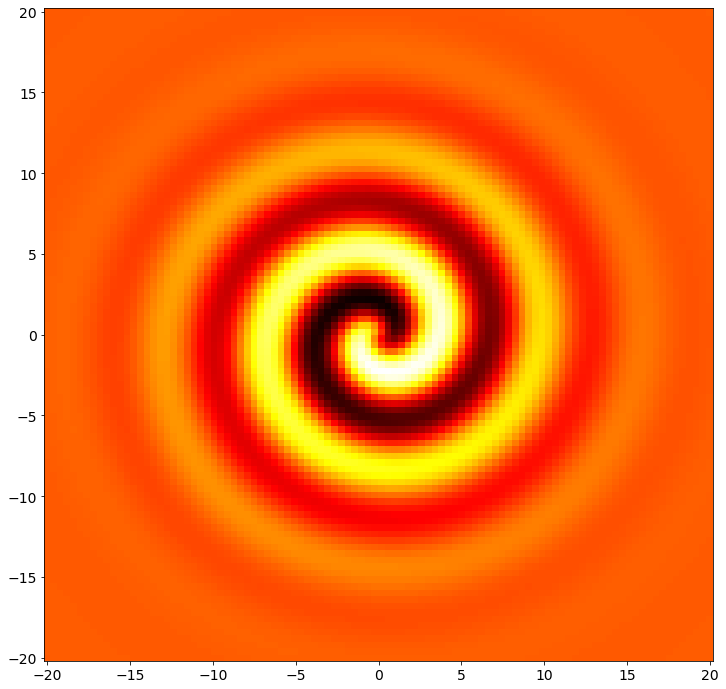

In [4]:
L = 20
n = 100
x = np.linspace(-L, L, n)
y = np.copy(x)

X, Y = np.meshgrid(x, y)

Xd = np.zeros((n ** 2, n))
for jj in range(n):
    u = np.tanh(np.sqrt(np.power(X, 2) + np.power(Y, 2))) * np.cos(np.angle(X + (1j) * Y) - np.sqrt(np.power(X, 2) + np.power(Y, 2)) + (jj + 1) / 10)
    f = np.exp(-0.01 * (np.power(X, 2) + np.power(Y, 2)))
    uf = u * f
    Xd[:, jj] = uf.reshape(-1)

plt.pcolor(x, y, uf, cmap='hot')
plt.show()

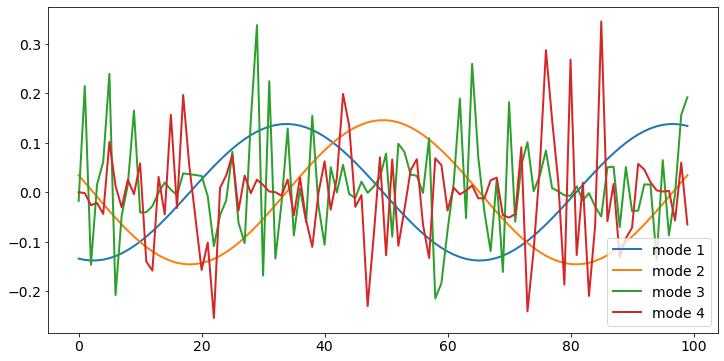

In [5]:
U, S, VT = np.linalg.svd(Xd, full_matrices=0)
V = VT.T

plt.rcParams['figure.figsize'] = [12, 6]

[plt.plot(V[:, k], linewidth=2, label='mode {}'.format(k + 1)) for k in range(4)]

plt.legend(loc='lower right')
plt.show()

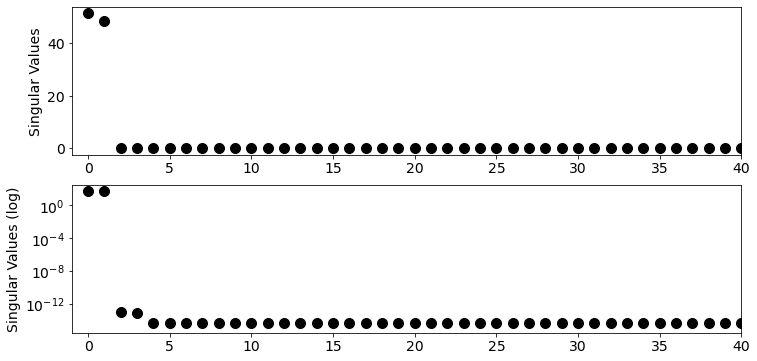

In [6]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(100 * S / np.sum(S), 'ko', ms=10)
axs[0].set_ylabel('Singular Values')
axs[1].semilogy(100 * S / np.sum(S), 'ko', ms=10)
axs[1].set_ylabel('Singular Values (log)')

for ax in axs:
    ax.set_xlim(-1, 40)

plt.show()

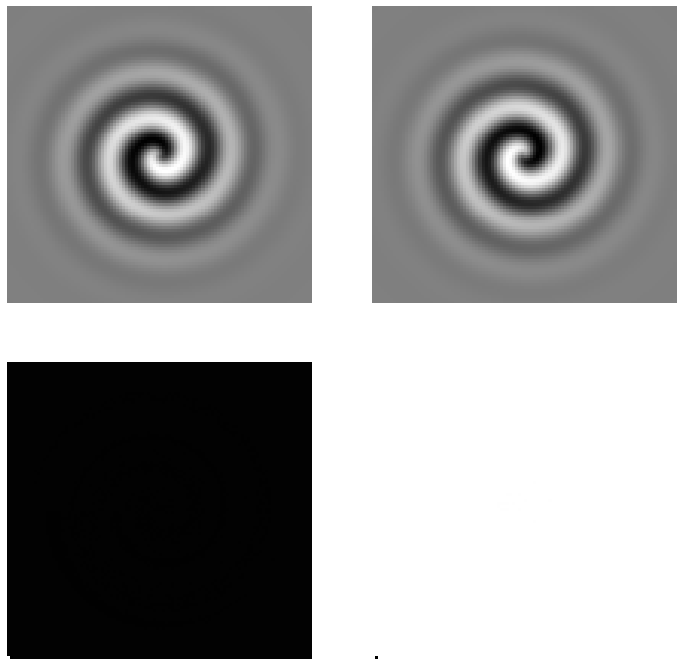

In [7]:
plt.rcParams['figure.figsize'] = [12, 12]
fig, axs = plt.subplots(2, 2)
axs = axs.reshape(-1)

for jj in range(4):
    mode = np.reshape(U[:, jj], (n, n))
    axs[jj].pcolor(X, Y, mode, cmap='gray')
    axs[jj].axis(False)


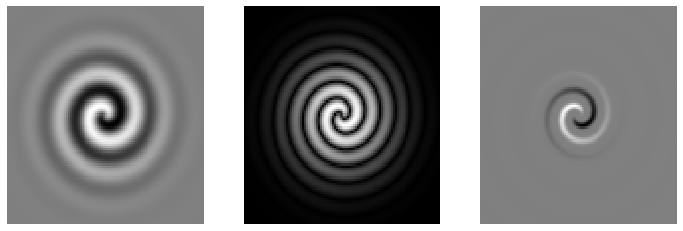

In [9]:
u = np.tanh(np.sqrt(np.power(X, 2) + np.power(Y, 2))) * np.cos(np.angle(X + (1j) * Y) - np.sqrt(np.power(X, 2) + np.power(Y, 2)))
f = np.exp(-0.01 * (np.power(X, 2) + np.power(Y, 2)))
uf = u * f

plt.rcParams['figure.figsize'] = [12, 4]
fig, axs = plt.subplots(1, 3)
axs[0].pcolor(x, y, uf, cmap='gray')
axs[1].pcolor(x, y, np.abs(uf), cmap='gray')
axs[2].pcolor(x, y, np.power(uf, 5), cmap='gray')

for ax in axs:
    ax.axis(False)

In [10]:
## Translation
n = 200
L = 20
x = np.linspace(-L, L, n)  # space
y = np.copy(x)
m = 41
T = 10
t = np.linspace(0, T, m)  # time
c = 3  # wave speed

X = np.zeros((n, m))
for jj in range(m):
    X[:, jj] = np.exp(-np.power(x + 15 - c * t[jj], 2))

U, S, VT = np.linalg.svd(X)
V = VT.T

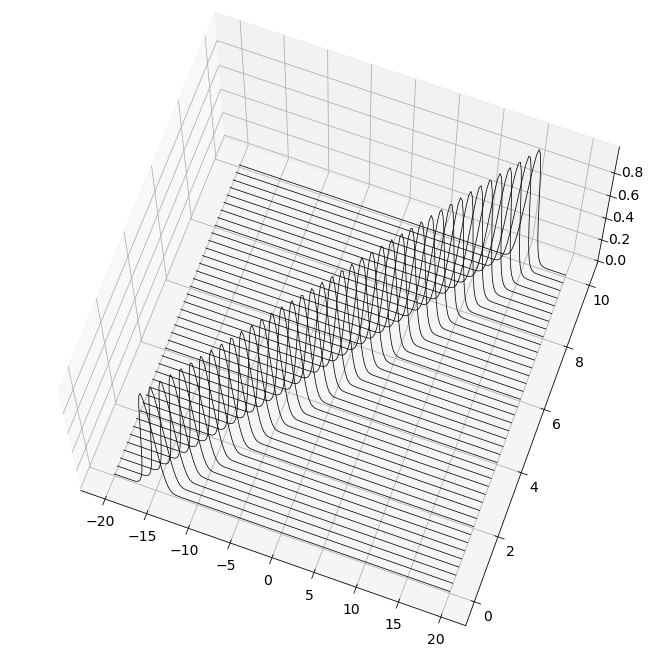

In [11]:
plt.rcParams['figure.figsize'] = [12, 12]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.view_init(elev=70, azim=-70)

for jj in range(m):
    ax.plot(x, t[jj] * np.ones_like(x), X[:, jj], 'k', linewidth=0.75)

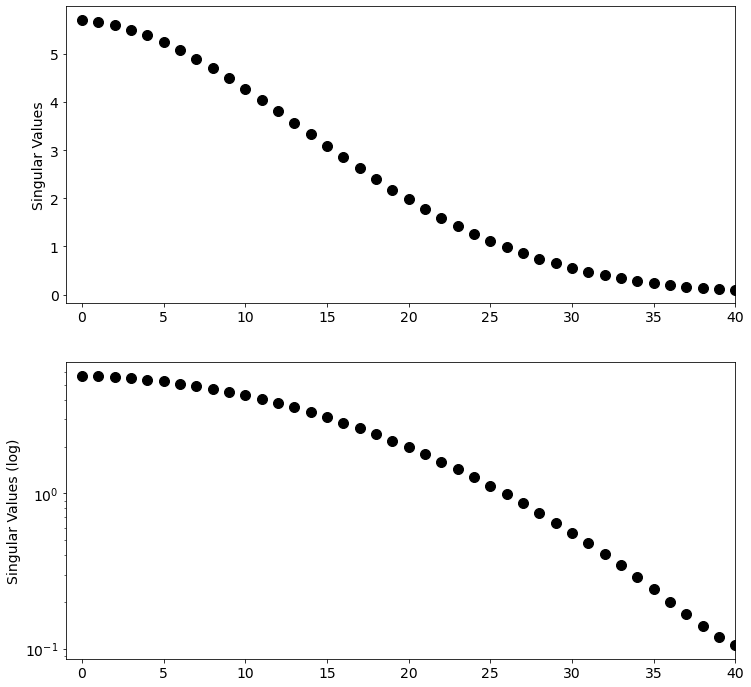

In [12]:
U2, S2, V2T = np.linalg.svd(X)
V2 = V2T.T

fig, axs = plt.subplots(2, 1)
axs[0].plot(100 * S2 / np.sum(S2), 'ko', ms=10)
axs[0].set_ylabel('Singular Values')
axs[1].semilogy(100 * S2 / np.sum(S2), 'ko', ms=10)
axs[1].set_ylabel('Singular Values (log)')

for ax in axs:
    ax.set_xlim(-1, 40)

plt.show()